In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
bronx_df = pd.read_csv('extra data sets/rollingsales_bronx.csv')
bronx_df = bronx_df.rename(columns = {'SALE\nPRICE':'SALE PRICE'})

bronx_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,"1,842","2,048",1901,1,A5,"$355,000",7/8/2013
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,"1,103","1,290",1910,1,A1,"$474,819",5/20/2013
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,"1,986","1,344",1899,1,A1,"$210,000",3/12/2013
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,"2,329","1,431",1901,1,A1,"$343,116",7/1/2013
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,"1,855","4,452",1931,1,S2,$0,8/31/2012


In [3]:
bronx_df['SALE PRICE'] = bronx_df['SALE PRICE'].str.replace('$','').str.replace(',',"")
bronx_df['SALE PRICE'] = bronx_df['SALE PRICE'].astype('int64')
bronx_df['LAND SQUARE FEET'] = bronx_df['LAND SQUARE FEET'].str.replace(',','')
bronx_df['LAND SQUARE FEET'] = bronx_df['LAND SQUARE FEET'].astype('int64')
bronx_df['GROSS SQUARE FEET'] = bronx_df['GROSS SQUARE FEET'].str.replace(',','')
bronx_df['GROSS SQUARE FEET'] = bronx_df['GROSS SQUARE FEET'].astype('int64')

bronx_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,7/8/2013
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,5/20/2013
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,3/12/2013
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,7/1/2013
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,8/31/2012


Text(0, 0.5, '# Properties')

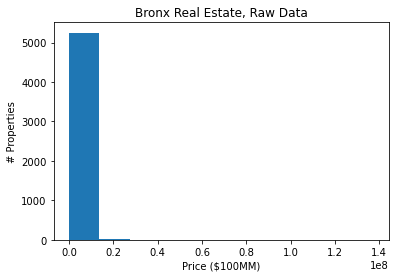

In [4]:
hist = plt.hist(bronx_df['SALE PRICE'])
plt.title('Bronx Real Estate, Raw Data')
plt.xlabel('Price ($100MM)')
plt.ylabel('# Properties')

Text(0.5, 0, 'Price ($100MM)')

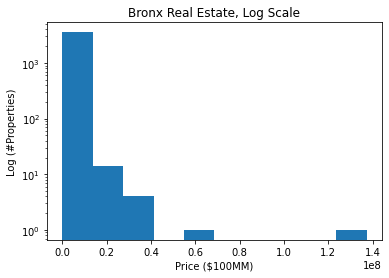

In [5]:
bronx_df = bronx_df.loc[~(bronx_df['SALE PRICE'] == 0)]

log_hist = plt.hist(bronx_df['SALE PRICE'], log = True)
plt.title('Bronx Real Estate, Log Scale')
plt.ylabel("Log (#Properties)")
plt.xlabel("Price ($100MM)")

Text(0, 0.5, 'Price ($100MM)')

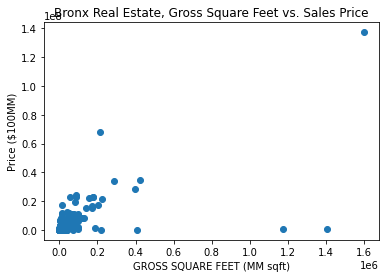

In [6]:
bronx_df = bronx_df.loc[~(bronx_df['GROSS SQUARE FEET'] == 0)]

scatter = plt.scatter(bronx_df['GROSS SQUARE FEET'], bronx_df['SALE PRICE'])
plt.title('Bronx Real Estate, Gross Square Feet vs. Sales Price')
plt.xlabel('GROSS SQUARE FEET (MM sqft)')
plt.ylabel('Price ($100MM)')

Text(0, 0.5, 'Price ($1MM)')

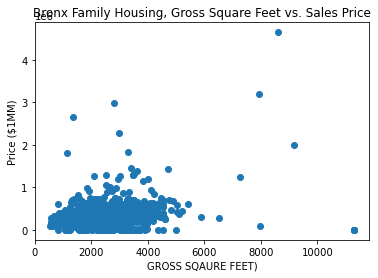

In [7]:
family_homes = bronx_df.loc[(bronx_df['BUILDING CLASS CATEGORY'].str.contains(pat = 'Family', case = False))]

family_scatter = plt.scatter(family_homes['GROSS SQUARE FEET'], family_homes['SALE PRICE'])

plt.title('Bronx Family Housing, Gross Square Feet vs. Sales Price')
plt.xlabel('GROSS SQAURE FEET)')
plt.ylabel('Price ($1MM)')

In [8]:
family_homes.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,1824.0,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03
mean,2.0,4299.636513,92.918860,10465.300439,0.020285,2982.568531,2317.190789,1940.035088,3.600325e+05
std,0.0,973.507369,225.831181,14.722508,0.144850,3239.145969,990.288536,30.281363,2.411518e+05
min,2.0,2266.000000,1.000000,10451.000000,0.000000,682.000000,528.000000,1899.000000,1.000000e+00
25%,2.0,3472.750000,23.000000,10461.000000,0.000000,2000.000000,1670.000000,1920.000000,2.500000e+05
50%,2.0,4464.000000,44.000000,10465.000000,0.000000,2500.000000,2124.000000,1930.000000,3.550000e+05
75%,2.0,5026.750000,74.000000,10469.000000,0.000000,2935.500000,2820.000000,1955.000000,4.400000e+05
max,2.0,5952.000000,3601.000000,10803.000000,2.000000,70773.000000,11297.000000,2012.000000,4.650000e+06
